In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Why do EDA?
   * Model Building
   * Validate Assumptions
   * Handling Missing Values
   * Feature Engineering
   * Detecting Outliers

# Step.1- Column Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Step 2- Univariate Analysis - Single Feature Analysis

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Age
**Conclusion**
- Age column is almost normaly distributed
- There are some outliers 
- 20% of the values is missing

In [8]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

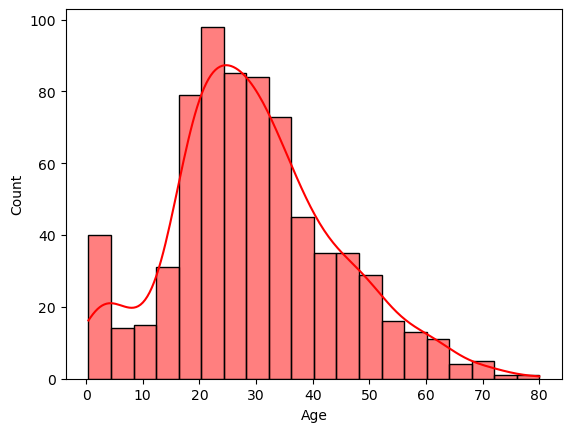

In [12]:
sns.histplot(df["Age"],kde=True,color="r")

<AxesSubplot:ylabel='Frequency'>

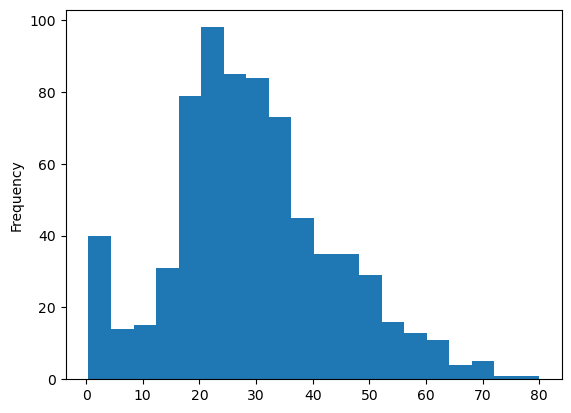

In [14]:
df["Age"].plot(kind="hist", bins=20,)

<AxesSubplot:ylabel='Density'>

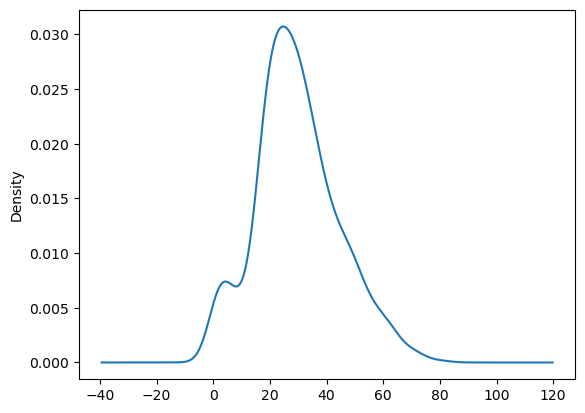

In [16]:
df["Age"].plot(kind="kde")

In [18]:
df["Age"].skew() 
#if 0 means normal , close to 0 means okay 
# +ve = positive skewness and vice verca

0.38910778230082704

<AxesSubplot:>

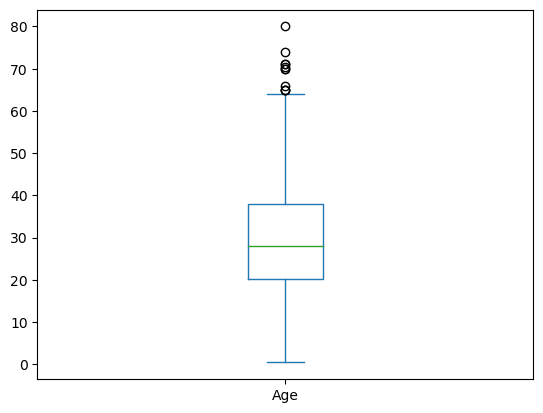

In [22]:
df["Age"].plot(kind="box")

In [23]:
df[df["Age"] > 65]

PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0      0      0  C.A. 24579  10.5000   NaN        S  
96   male  71.0      0      0    PC 17754  34.6542    A5        C  
116  male  70.5      0      0      370369   7.7500   NaN        Q  
493  male  71.0      0      0    PC 17609  49.5042   NaN        C  
630  male  80.0      0      0       27042  30.0000   A23        S  
672  male  70.0      0      0  C.A. 24580  10.5000   NaN        S  
745  male  70.0      1      1   WE/P 5735  71.0000   B22        S  
851  male  74.0      0      0      347060   7.7750   NaN        S

As per check these values are valid 

In [26]:
df["Age"].isnull().sum() / len(df["Age"])

0.19865319865319866

# Fare
**Conclusion**
- Data is higly positive skewed
- Fare data is the group fare a family not for an individual - may be an issue - Need To Feature Engineer The Column To Extract Individual Fare
- No missing Values

In [28]:
df["Fare"].describeribe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:ylabel='Frequency'>

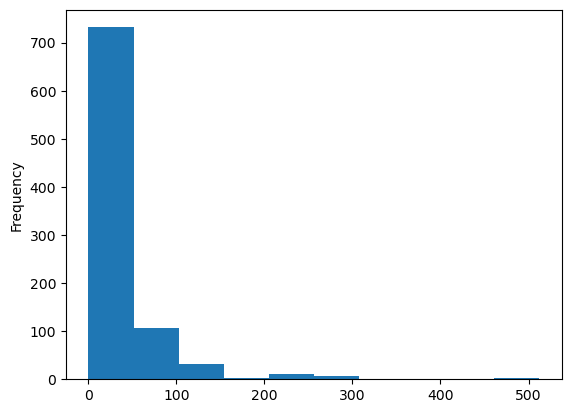

In [30]:
df["Fare"].plot(kind="hist")

<AxesSubplot:ylabel='Density'>

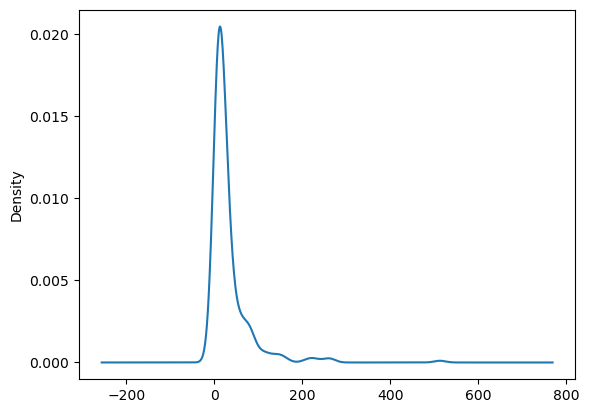

In [31]:
df["Fare"].plot(kind="kde")

In [33]:
df["Fare"].skew()
#It's higly positive skewed

4.787316519674893

<AxesSubplot:>

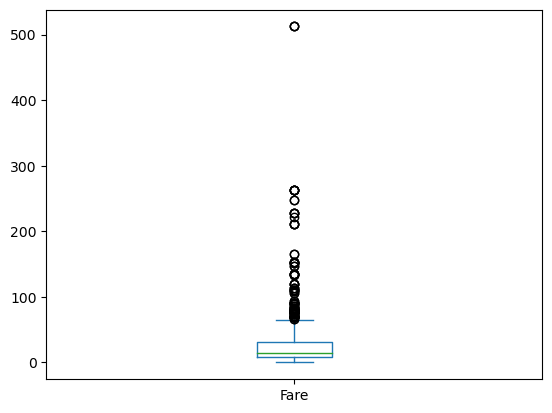

In [34]:
df["Fare"].plot(kind="box")

In [40]:
 df[df["Fare"] > 250]

PassengerId  Survived  Pclass                                   Name  \
27            28         0       1         Fortune, Mr. Charles Alexander   
88            89         1       1             Fortune, Miss. Mabel Helen   
258          259         1       1                       Ward, Miss. Anna   
311          312         1       1             Ryerson, Miss. Emily Borie   
341          342         1       1         Fortune, Miss. Alice Elizabeth   
438          439         0       1                      Fortune, Mr. Mark   
679          680         1       1     Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1                 Lesurer, Mr. Gustave J   
742          743         1       1  Ryerson, Miss. Susan Parker "Suzette"   

        Sex   Age  SibSp  Parch    Ticket      Fare            Cabin Embarked  
27     male  19.0      3      2     19950  263.0000      C23 C25 C27        S  
88   female  23.0      3      2     19950  263.0000      C23 C25 C27        S  
258  female  35.0      0      0  PC 17755  512.3292              NaN        C  
311  female  18.0      2      2  PC 17608  262.3750  B57 B59 B63 B66        C  
341  female  24.0      3      2     19950  263.0000      C23 C25 C27        S  
438    male  64.0      1      4     19950  263.0000      C23 C25 C27        S  
679    male  36.0      0      1  PC 17755  512.3292      B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292             B101        C  
742  female  21.0      2      2  PC 17608  262.3750  B57 B59 B63 B66        C

**Note Some Pessengers have same TicketID and fare, so as per review The fare is combinely of a family not an individual**

In [41]:
df["Fare"].isnull().sum()

0

# Steps of doing Univariate Analysis on Categorical columns
- **Descriptive Statistics:** Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

- **Visualizations:** Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

- **Missing Values:** Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

- **Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

# Survived Columns
**Conclusions**
- Most deadly Accident, only 38.4% pessender could surivive
- No null values

In [42]:
df["Survived"].value_counts()
#-0 = Died

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

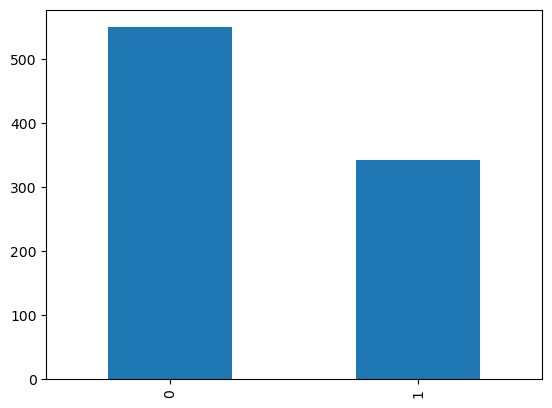

In [56]:
df["Survived"].value_counts().plot(kind="bar")
#sns.countplot(df["Survived"])
#plt.show()

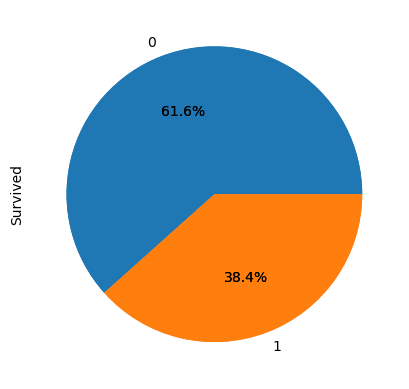

In [54]:
df["Survived"].value_counts().plot(kind="pie", autopct="%0.1f%%")
#plt.pie(df["Survived"].value_counts(), autopct="%0.1f%%")
#plt.show()

In [57]:
df["Survived"].isnull().sum()

0

# P-Class
**Conclusion**
- Surprisingly more people travelled in Class 1 as compared to 2

In [58]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [59]:
df["Pclass"].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

<AxesSubplot:>

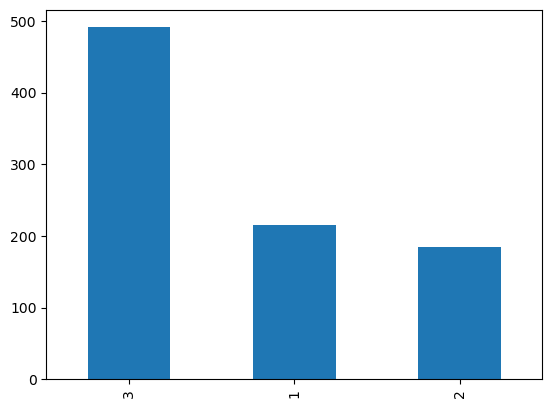

In [60]:
df["Pclass"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Pclass'>

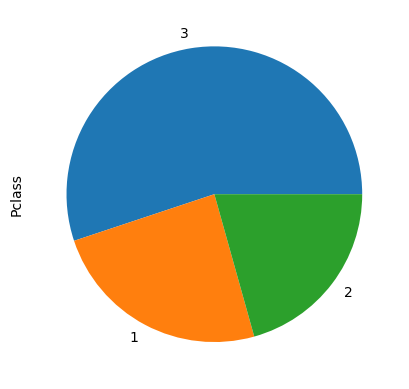

In [61]:
df["Pclass"].value_counts().plot(kind="pie")

In [62]:
df["Pclass"].isnull().sum()

0

# Sex

In [63]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

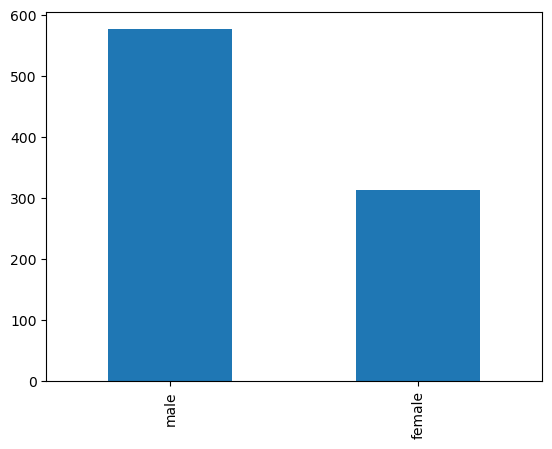

In [64]:
df["Sex"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Sex'>

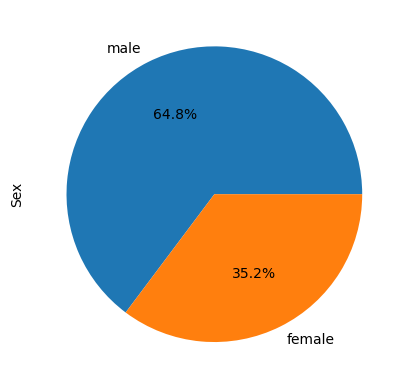

In [71]:
df["Sex"].value_counts().plot(kind="pie", autopct="%0.1f%%") # %0.1f =38.2 and %0.1f%% = 38.2%

In [72]:
df["Sex"].isnull().sum()

0

# SIBSP = Sibiling Spouse And Parch - ParentChild
**Conclusion**
- Parch and Sibsp can be merged together as Family Size
- Create a new column caleed is_alone

In [73]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:>

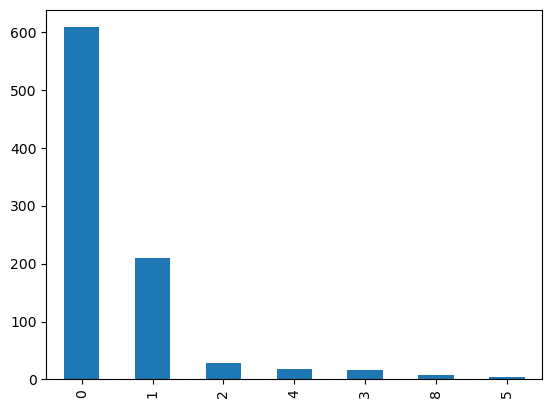

In [74]:
df["SibSp"].value_counts().plot(kind="bar")

In [76]:
df["SibSp"].isnull().sum()

0

In [77]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:>

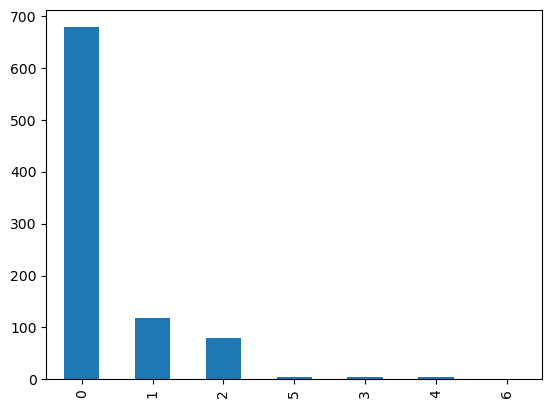

In [78]:
df["Parch"].value_counts().plot(kind="bar")

# Embarked

<AxesSubplot:>

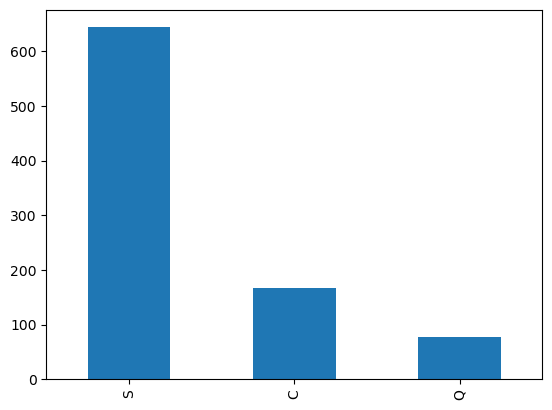

In [82]:
df["Embarked"].value_counts().plot(kind="bar")

In [83]:
df["Embarked"].isnull().sum()

2

# Mixed Columns = STR+Int
- i.e. Name, Ticket, Cabin

**Conclusion**
- Need to feature engineer, right now can not be analyzed

# Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship 3- Possibilities
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [89]:
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

- Let's Do one by One
- 1- Survived and 2nd- Pclass
##### Both are categorical

**Contigency Table**

In [3]:
pd.crosstab(df["Survived"],df["Pclass"])

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

In [92]:
pd.crosstab(df["Survived"],df["Pclass"], normalize='columns')
#In Percentage

Pclass          1         2         3
Survived                             
0         0.37037  0.527174  0.757637
1         0.62963  0.472826  0.242363

P_class 1 is the most safe as per table

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

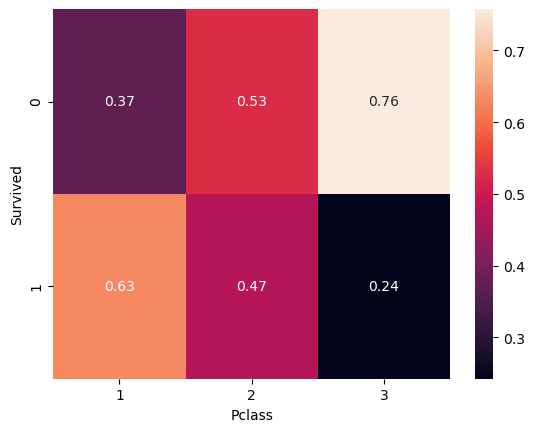

In [4]:
sns.heatmap(pd.crosstab(df["Survived"],df["Pclass"], normalize='columns'), annot=True)

# Survived and Sex

In [94]:
pd.crosstab(df["Survived"],df["Sex"], normalize='columns')

Sex         female      male
Survived                    
0         0.257962  0.811092
1         0.742038  0.188908

Ladies First 😂😂

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

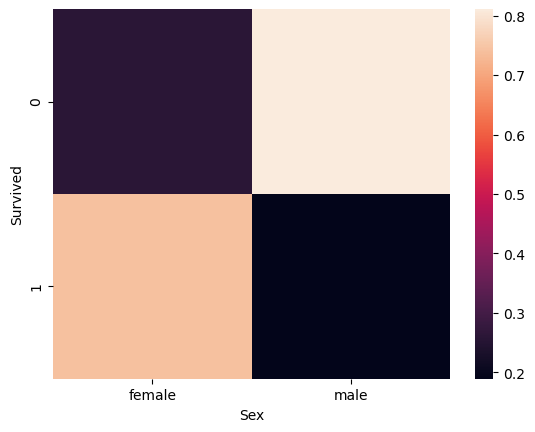

In [95]:
sns.heatmap(pd.crosstab(df["Survived"],df["Sex"], normalize='columns'))

# Survived and Embarked

In [96]:
pd.crosstab(df["Survived"],df["Embarked"], normalize='columns')

Embarked         C        Q         S
Survived                             
0         0.446429  0.61039  0.663043
1         0.553571  0.38961  0.336957

Some how there is also difference, that People from  Cherbourg  have more survival ratio as compared to other state's people.

***Assumptions**
May be there are more females or passengers are in pclass - 1

In [6]:
pd.crosstab(df["Sex"],df["Embarked"] , normalize="columns")

Embarked         C         Q         S
Sex                                   
female    0.434524  0.467532  0.315217
male      0.565476  0.532468  0.684783

In [7]:
pd.crosstab(df["Pclass"],df["Embarked"] , normalize="columns")

Embarked         C         Q         S
Pclass                                
1         0.505952  0.025974  0.197205
2         0.101190  0.038961  0.254658
3         0.392857  0.935065  0.548137

Conclusion: Mostly Passengers embarked from  Cherbourg  are in Pclasss

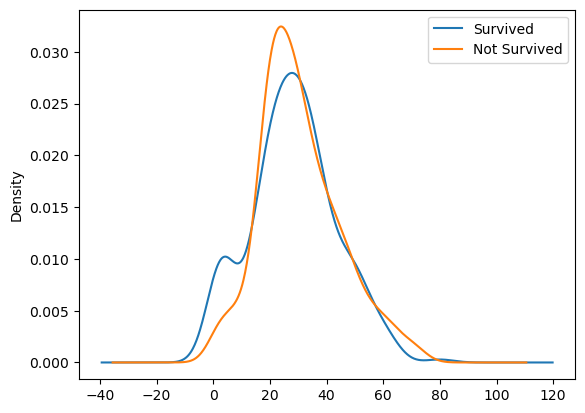

In [11]:
# Survived Vs AGE
df[df["Survived"] == 1]["Age"].plot(kind="kde", label="Survived")
df[df["Survived"] == 0]["Age"].plot(kind="kde", label="Not Survived")
plt.legend()
plt.show()

From graph it can be observed the Child(0-5 or 7) are given priorities as the blue curve seems dominant in that area
#### How survival chances{Probability} varry with age

In [12]:
df[df["Pclass"]== 1]["Age"].mean()

38.233440860215055

# Feature Engineering

### Fare Column 
As it is representing the group/Family fare not of an individual

In [13]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
df[df["SibSp"] == 8]

PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2343  69.55   NaN        S  
846  NaN      8      2  CA. 2343  69.55   NaN        S  
863  NaN      8      2  CA. 2343  69.55   NaN        S

Note: Last Name, Ticket No, Fare etc

Total Family Members = 1(The Individual) + ParentChild + SiblingSpouse
* as per check there are total 11 (1 + 8 + 2) family members but record is missing shayad, Let's Check

In [15]:
df[df["Ticket"] == "CA. 2343"]

PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2343  69.55   NaN        S  
846  NaN      8      2  CA. 2343  69.55   NaN        S  
863  NaN      8      2  CA. 2343  69.55   NaN        S

In [16]:
df[df['Name'].str.contains("Sage")]

PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
641          642         1       1               Sagesser, Mlle. Emma  female   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

      Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159   NaN      8      2  CA. 2343  69.55   NaN        S  
180   NaN      8      2  CA. 2343  69.55   NaN        S  
201   NaN      8      2  CA. 2343  69.55   NaN        S  
324   NaN      8      2  CA. 2343  69.55   NaN        S  
641  24.0      0      0  PC 17477  69.30   B35        C  
792   NaN      8      2  CA. 2343  69.55   NaN        S  
846   NaN      8      2  CA. 2343  69.55   NaN        S  
863   NaN      8      2  CA. 2343  69.55   NaN        S

**Record for other family members is missing or MAY BE TEST SET MAI HON**

In [17]:
69.55/11

6.322727272727272

In [19]:
df2 = pd.read_csv("test.csv")
df2[df2['Name'].str.contains("Sage")]

PassengerId  Pclass                            Name     Sex   Age  SibSp  \
188         1080       3                 Sage, Miss. Ada  female   NaN      8   
342         1234       3           Sage, Mr. John George    male   NaN      1   
360         1252       3     Sage, Master. William Henry    male  14.5      8   
365         1257       3  Sage, Mrs. John (Annie Bullen)  female   NaN      1   

     Parch    Ticket   Fare Cabin Embarked  
188      2  CA. 2343  69.55   NaN        S  
342      9  CA. 2343  69.55   NaN        S  
360      2  CA. 2343  69.55   NaN        S  
365      9  CA. 2343  69.55   NaN        S

**GOTCHA 😊**

In [22]:
df = pd.concat([df,df2])

In [23]:
df[df["Ticket"] == "CA. 2343"]

PassengerId  Survived  Pclass                               Name     Sex  \
159          160       0.0       3         Sage, Master. Thomas Henry    male   
180          181       0.0       3       Sage, Miss. Constance Gladys  female   
201          202       0.0       3                Sage, Mr. Frederick    male   
324          325       0.0       3           Sage, Mr. George John Jr    male   
792          793       0.0       3            Sage, Miss. Stella Anna  female   
846          847       0.0       3           Sage, Mr. Douglas Bullen    male   
863          864       0.0       3  Sage, Miss. Dorothy Edith "Dolly"  female   
188         1080       NaN       3                    Sage, Miss. Ada  female   
342         1234       NaN       3              Sage, Mr. John George    male   
360         1252       NaN       3        Sage, Master. William Henry    male   
365         1257       NaN       3     Sage, Mrs. John (Annie Bullen)  female   

      Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159   NaN      8      2  CA. 2343  69.55   NaN        S  
180   NaN      8      2  CA. 2343  69.55   NaN        S  
201   NaN      8      2  CA. 2343  69.55   NaN        S  
324   NaN      8      2  CA. 2343  69.55   NaN        S  
792   NaN      8      2  CA. 2343  69.55   NaN        S  
846   NaN      8      2  CA. 2343  69.55   NaN        S  
863   NaN      8      2  CA. 2343  69.55   NaN        S  
188   NaN      8      2  CA. 2343  69.55   NaN        S  
342   NaN      1      9  CA. 2343  69.55   NaN        S  
360  14.5      8      2  CA. 2343  69.55   NaN        S  
365   NaN      1      9  CA. 2343  69.55   NaN        S

Total 11 Family Members

In [24]:
df["Ticket"].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [25]:
df[df["Ticket"] == "CA 2144"]

PassengerId  Survived  Pclass                                     Name  \
59            60       0.0       3       Goodwin, Master. William Frederick   
71            72       0.0       3               Goodwin, Miss. Lillian Amy   
386          387       0.0       3          Goodwin, Master. Sidney Leonard   
480          481       0.0       3           Goodwin, Master. Harold Victor   
678          679       0.0       3  Goodwin, Mrs. Frederick (Augusta Tyler)   
683          684       0.0       3              Goodwin, Mr. Charles Edward   
139         1031       NaN       3           Goodwin, Mr. Charles Frederick   
140         1032       NaN       3              Goodwin, Miss. Jessie Allis   

        Sex   Age  SibSp  Parch   Ticket  Fare Cabin Embarked  
59     male  11.0      5      2  CA 2144  46.9   NaN        S  
71   female  16.0      5      2  CA 2144  46.9   NaN        S  
386    male   1.0      5      2  CA 2144  46.9   NaN        S  
480    male   9.0      5      2  CA 2144  46.9   NaN        S  
678  female  43.0      1      6  CA 2144  46.9   NaN        S  
683    male  14.0      5      2  CA 2144  46.9   NaN        S  
139    male  40.0      1      6  CA 2144  46.9   NaN        S  
140  female  10.0      5      2  CA 2144  46.9   NaN        S

In [28]:
df["individual_fare"]= df["Fare"] / (df["SibSp"] + df["Parch"] + 1)

<AxesSubplot:>

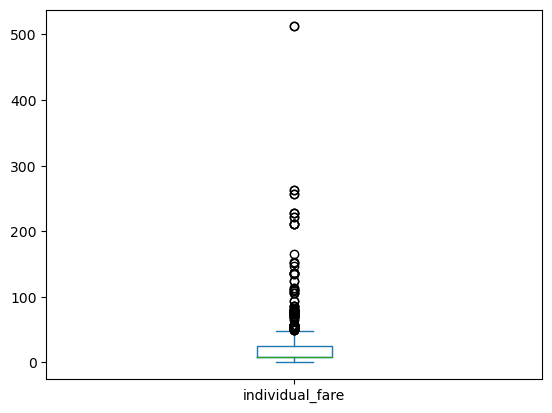

In [29]:
df["individual_fare"].plot(kind="box")

In [34]:
df["individual_fare"].describecribe()

count    1308.000000
mean       20.518215
std        35.774337
min         0.000000
25%         7.452767
50%         8.512483
75%        24.237500
max       512.329200
Name: individual_fare, dtype: float64

In [35]:
df["individual_fare"].max()

512.3292

In [36]:
df[df["individual_fare"] > 450]

PassengerId  Survived  Pclass                    Name     Sex   Age  \
258          259       1.0       1        Ward, Miss. Anna  female  35.0   
737          738       1.0       1  Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Ticket      Fare Cabin Embarked  individual_fare  
258      0      0  PC 17755  512.3292   NaN        C         512.3292  
737      0      0  PC 17755  512.3292  B101        C         512.3292

In [37]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [38]:
df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  individual_fare  \
0      0         A/5 21171   7.2500   NaN        S          3.62500   
1      0          PC 17599  71.2833   C85        C         35.64165   
2      0  STON/O2. 3101282   7.9250   NaN        S          7.92500   
3      0            113803  53.1000  C123        S         26.55000   
4      0            373450   8.0500   NaN        S          8.05000   

   family_size  
0            2  
1            2  
2            1  
3            2  
4            1

In [39]:
#Family Type
# 1 =alone
# 2-4 = Small
# >4 = Larger
def family_type(x):
    if x == 1:
        return "alone"
    elif x>1 and x<5:
        return "small"
    else:
        return "large"

In [40]:
df["family_type"] = df["family_size"].apply(family_type)

In [41]:
df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  individual_fare  \
0      0         A/5 21171   7.2500   NaN        S          3.62500   
1      0          PC 17599  71.2833   C85        C         35.64165   
2      0  STON/O2. 3101282   7.9250   NaN        S          7.92500   
3      0            113803  53.1000  C123        S         26.55000   
4      0            373450   8.0500   NaN        S          8.05000   

   family_size family_type  
0            2       small  
1            2       small  
2            1       alone  
3            2       small  
4            1       alone

In [42]:
pd.crosstab(df["Survived"], df["family_type"], normalize="columns")

family_type     alone    large     small
Survived                                
0.0          0.696462  0.83871  0.421233
1.0          0.303538  0.16129  0.578767

Conclusion: If you're travelling with small family, there are good chance of survival

In [47]:
X="Ali ke Sath"
X.split(" ")

['Ali', 'ke', 'Sath']

In [50]:
X="Ali ke Sath"
X.split(" ")[0]

'Ali'

# Lets Make Surname and Title Column To Identify Families

In [51]:
df["Name"].str.split(",").str.get(0)

0             Braund
1            Cumings
2          Heikkinen
3           Futrelle
4              Allen
           ...      
413          Spector
414    Oliva y Ocana
415          Saether
416             Ware
417            Peter
Name: Name, Length: 1309, dtype: object

In [69]:
df["Surname"] = df["Name"].str.split(",").str.get(0)

In [53]:
df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  individual_fare  \
0      0         A/5 21171   7.2500   NaN        S          3.62500   
1      0          PC 17599  71.2833   C85        C         35.64165   
2      0  STON/O2. 3101282   7.9250   NaN        S          7.92500   
3      0            113803  53.1000  C123        S         26.55000   
4      0            373450   8.0500   NaN        S          8.05000   

   family_size family_type    Surname  
0            2       small     Braund  
1            2       small    Cumings  
2            1       alone  Heikkinen  
3            2       small   Futrelle  
4            1       alone      Allen

In [56]:
df["Surname"].nunique()

875

Getting Titles i.e. Mr Mrs etc

In [58]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [62]:
df["Name"].str.split(",").str.get(1)

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: Name, Length: 1309, dtype: object

In [60]:
df["Name"].str.split(",").str.get(1)

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: Name, Length: 1309, dtype: object

In [63]:
df["Name"].str.split(",").str.get(1).str.strip() # To remove spaces

0                                 Mr. Owen Harris
1      Mrs. John Bradley (Florence Briggs Thayer)
2                                     Miss. Laina
3              Mrs. Jacques Heath (Lily May Peel)
4                               Mr. William Henry
                          ...                    
413                                     Mr. Woolf
414                                 Dona. Fermina
415                           Mr. Simon Sivertsen
416                                 Mr. Frederick
417                             Master. Michael J
Name: Name, Length: 1309, dtype: object

In [65]:
df["Name"].str.split(",").str.get(1).str.strip().str.split(" ")

0                                    [Mr., Owen, Harris]
1      [Mrs., John, Bradley, (Florence, Briggs, Thayer)]
2                                         [Miss., Laina]
3              [Mrs., Jacques, Heath, (Lily, May, Peel)]
4                                  [Mr., William, Henry]
                             ...                        
413                                         [Mr., Woolf]
414                                     [Dona., Fermina]
415                              [Mr., Simon, Sivertsen]
416                                     [Mr., Frederick]
417                                [Master., Michael, J]
Name: Name, Length: 1309, dtype: object

In [66]:
df["Name"].str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)

0          Mr.
1         Mrs.
2        Miss.
3         Mrs.
4          Mr.
        ...   
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Name, Length: 1309, dtype: object

In [70]:
df["Title"] = df["Name"].str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)

In [74]:
df.Title.value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [75]:
df['Title'].str.replace(["Rev.", "Dr.", "Col.", "Major.", "Don.", "Capt.","the", "Jonkheer."],'other')

TypeError: unhashable type: 'list'

In [83]:
df.drop("Titled",axis=1,inplace=True)

In [84]:
#, "Dr.", "Col.", "Major.", "Don.", "Capt.","the", "Jonkheer."]
df["Title"] = df['Title'].str.replace("Rev.",'other')
df["Title"] = df['Title'].str.replace("Dr.",'other')
df["Title"] = df['Title'].str.replace("Col.",'other')
df["Title"] = df['Title'].str.replace("Major.",'other')
df["Title"] = df['Title'].str.replace("Don.",'other')
df["Title"] = df['Title'].str.replace("Capt.",'other')
df["Title"] = df['Title'].str.replace("the",'other')
df["Title"] = df['Title'].str.replace("Jonkheer.",'other')
df["Title"].value_counts()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10216\4020339266.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Title"] = df['Title'].str.replace("Rev.",'other')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10216\4020339266.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Title"] = df['Title'].str.replace("Dr.",'other')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10216\4020339266.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Title"] = df['Title'].str.replace("Col.",'other')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10216\4020339266.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Title"] = df['Title'].str.replace("Major.",'other')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10216\4020339266.py:6: FutureWarning: The default value of regex will change from True 

Mr.         757
Miss.       260
Mrs.        197
Master.      61
ootherr      24
Ms.           2
Mlle.         2
other         2
Mme.          1
Lady.         1
Sir.          1
ootherr.      1
Name: Title, dtype: int64

OOtheerr ?????

In [85]:
temp_df = df[df["Title"].isin(["Mr.","Mrs.","Miss.","Master.","ootherr"])]

In [88]:
pd.crosstab(temp_df["Survived"],temp_df["Title"], normalize="columns")

Title     Master.     Miss.       Mr.   Mrs.   ootherr
Survived                                              
0.0         0.425  0.302198  0.843327  0.208  0.736842
1.0         0.575  0.697802  0.156673  0.792  0.263158

 Again Ladies First 😂😂

# Cabin Columns

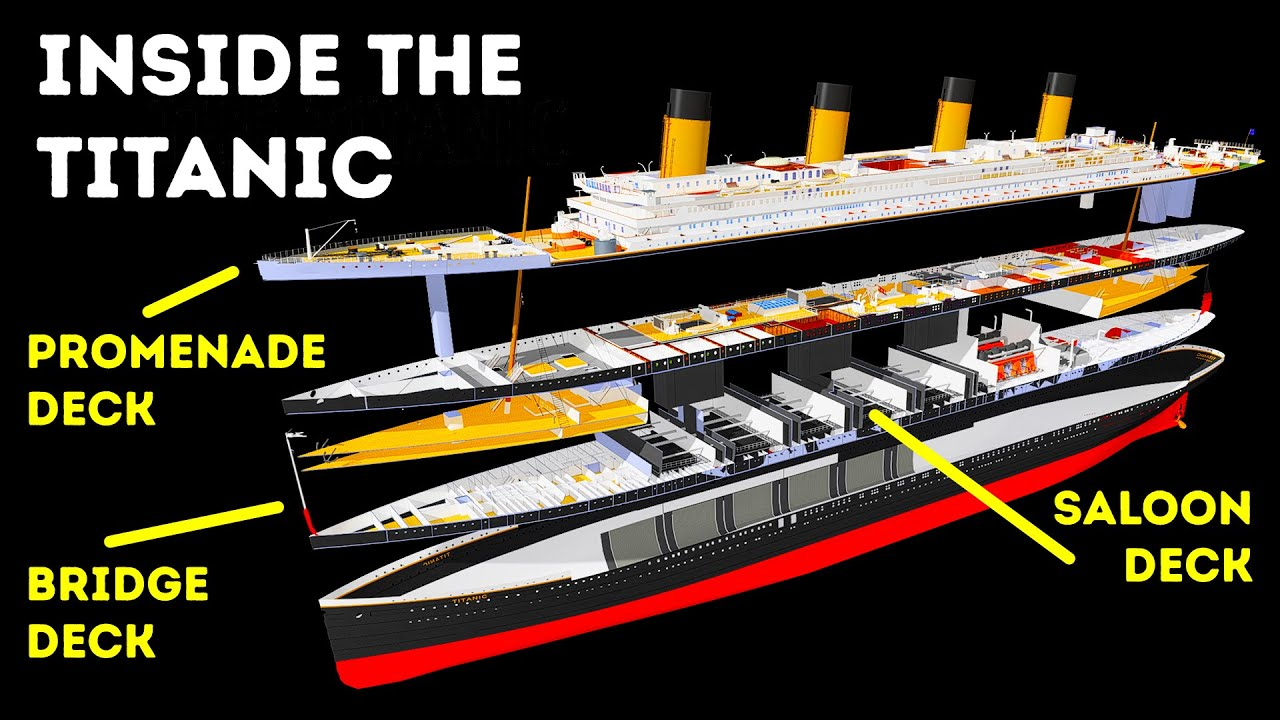


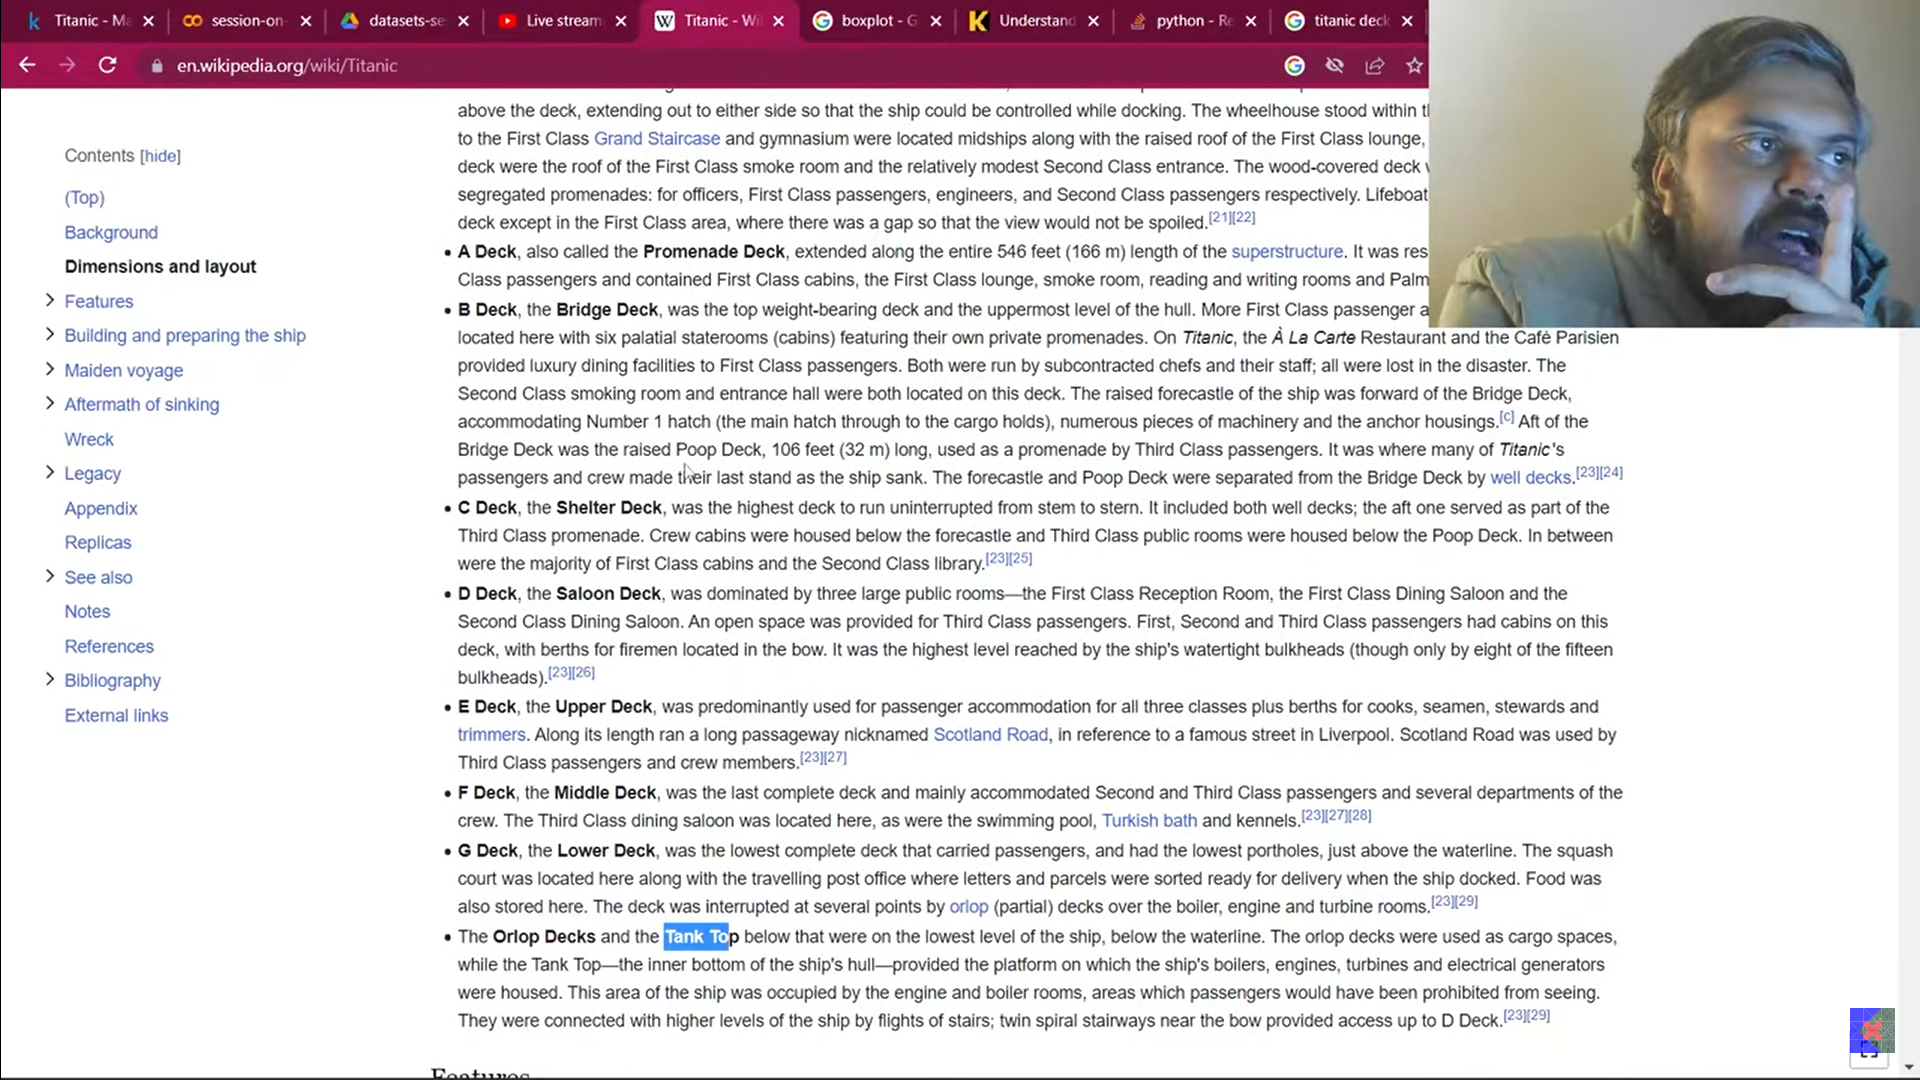
- A Deck- Also called Promenade Dec
- B Deck = Bridge Deck
- C = Shelter Deck
- D = Saloon Deck
- E = Upper Deck
- F = Lower Deck


In [89]:
df["Cabin"].isnull().sum() / len(df)

0.774637127578304

In [91]:
df["Cabin"].value_counts().head(15)

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
E34                3
B58 B60            3
A34                3
E101               3
C101               3
Name: Cabin, dtype: int64

#### Layout seems so important here, so why to remove this column, Lets engineer it

In [93]:
df["Cabin"].fillna("M", inplace=True)

In [95]:
df["Cabin"].str[0]

0      M
1      C
2      M
3      C
4      M
      ..
413    M
414    C
415    M
416    M
417    M
Name: Cabin, Length: 1309, dtype: object

In [96]:
df["deck"] = df["Cabin"].str[0]

In [97]:
df["deck"].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: deck, dtype: int64

In [98]:
pd.crosstab(df["Pclass"],df["deck"])

deck     A   B   C   D   E   F  G    M  T
Pclass                                   
1       22  65  94  40  34   0  0   67  1
2        0   0   0   6   4  13  0  254  0
3        0   0   0   0   3   8  5  693  0

In [102]:
pd.crosstab(df["deck"],df["Pclass"],normalize="index")

Pclass         1         2         3
deck                                
A       1.000000  0.000000  0.000000
B       1.000000  0.000000  0.000000
C       1.000000  0.000000  0.000000
D       0.869565  0.130435  0.000000
E       0.829268  0.097561  0.073171
F       0.000000  0.619048  0.380952
G       0.000000  0.000000  1.000000
M       0.066075  0.250493  0.683432
T       1.000000  0.000000  0.000000

In [103]:
pd.crosstab(df["Survived"], df["deck"], normalize="columns")

deck             A         B        C         D     E         F    G  \
Survived                                                               
0.0       0.533333  0.255319  0.40678  0.242424  0.25  0.384615  0.5   
1.0       0.466667  0.744681  0.59322  0.757576  0.75  0.615385  0.5   

deck             M    T  
Survived                 
0.0       0.700146  1.0  
1.0       0.299854  0.0

<AxesSubplot:xlabel='deck'>

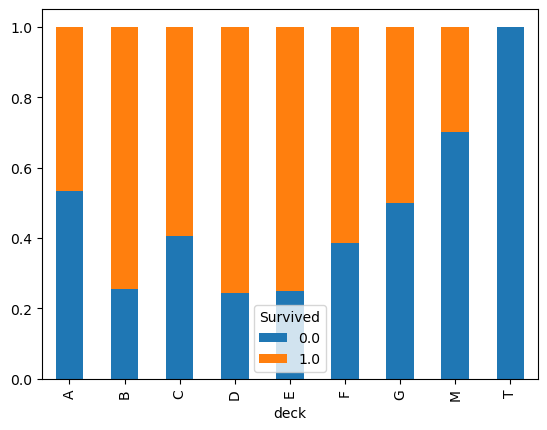

In [105]:
pd.crosstab(df["deck"], df["Survived"], normalize="index").plot(kind="bar", stacked=True)

Some how survival rate is connected with deck
- D,E looks similiar

In [106]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp  \
PassengerId         1.000000 -0.005007 -0.038354  0.028814 -0.055224   
Survived           -0.005007  1.000000 -0.338481 -0.077221 -0.035322   
Pclass             -0.038354 -0.338481  1.000000 -0.408106  0.060832   
Age                 0.028814 -0.077221 -0.408106  1.000000 -0.243699   
SibSp              -0.055224 -0.035322  0.060832 -0.243699  1.000000   
Parch               0.008942  0.081629  0.018322 -0.150917  0.373587   
Fare                0.031428  0.257307 -0.558629  0.178740  0.160238   
individual_fare     0.035365  0.221600 -0.504270  0.193545 -0.089807   
family_size        -0.031437  0.016639  0.050027 -0.240229  0.861952   

                    Parch      Fare  individual_fare  family_size  
PassengerId      0.008942  0.031428         0.035365    -0.031437  
Survived         0.081629  0.257307         0.221600     0.016639  
Pclass           0.018322 -0.558629        -0.504270     0.050027  
Age             -0.150917  0.178740         0.193545    -0.240229  
SibSp            0.373587  0.160238        -0.089807     0.861952  
Parch            1.000000  0.221539        -0.065498     0.792296  
Fare             0.221539  1.000000         0.832029     0.226492  
individual_fare -0.065498  0.832029         1.000000    -0.094874  
family_size      0.792296  0.226492        -0.094874     1.000000

In [107]:
df.corr()["Survived"]

PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
individual_fare    0.221600
family_size        0.016639
Name: Survived, dtype: float64

<AxesSubplot:>

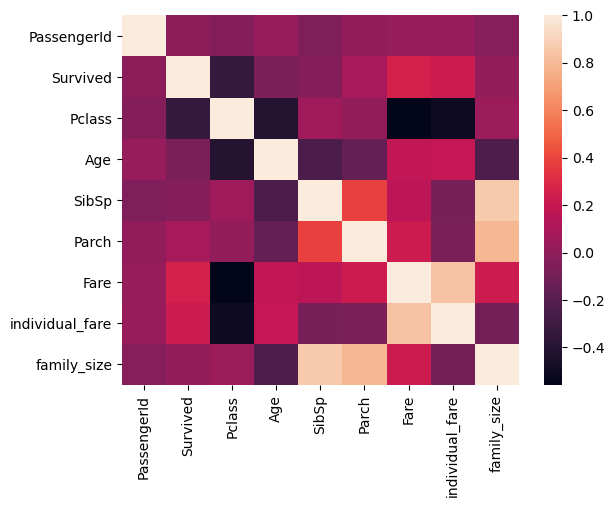

In [108]:
sns.heatmap(df.corr())

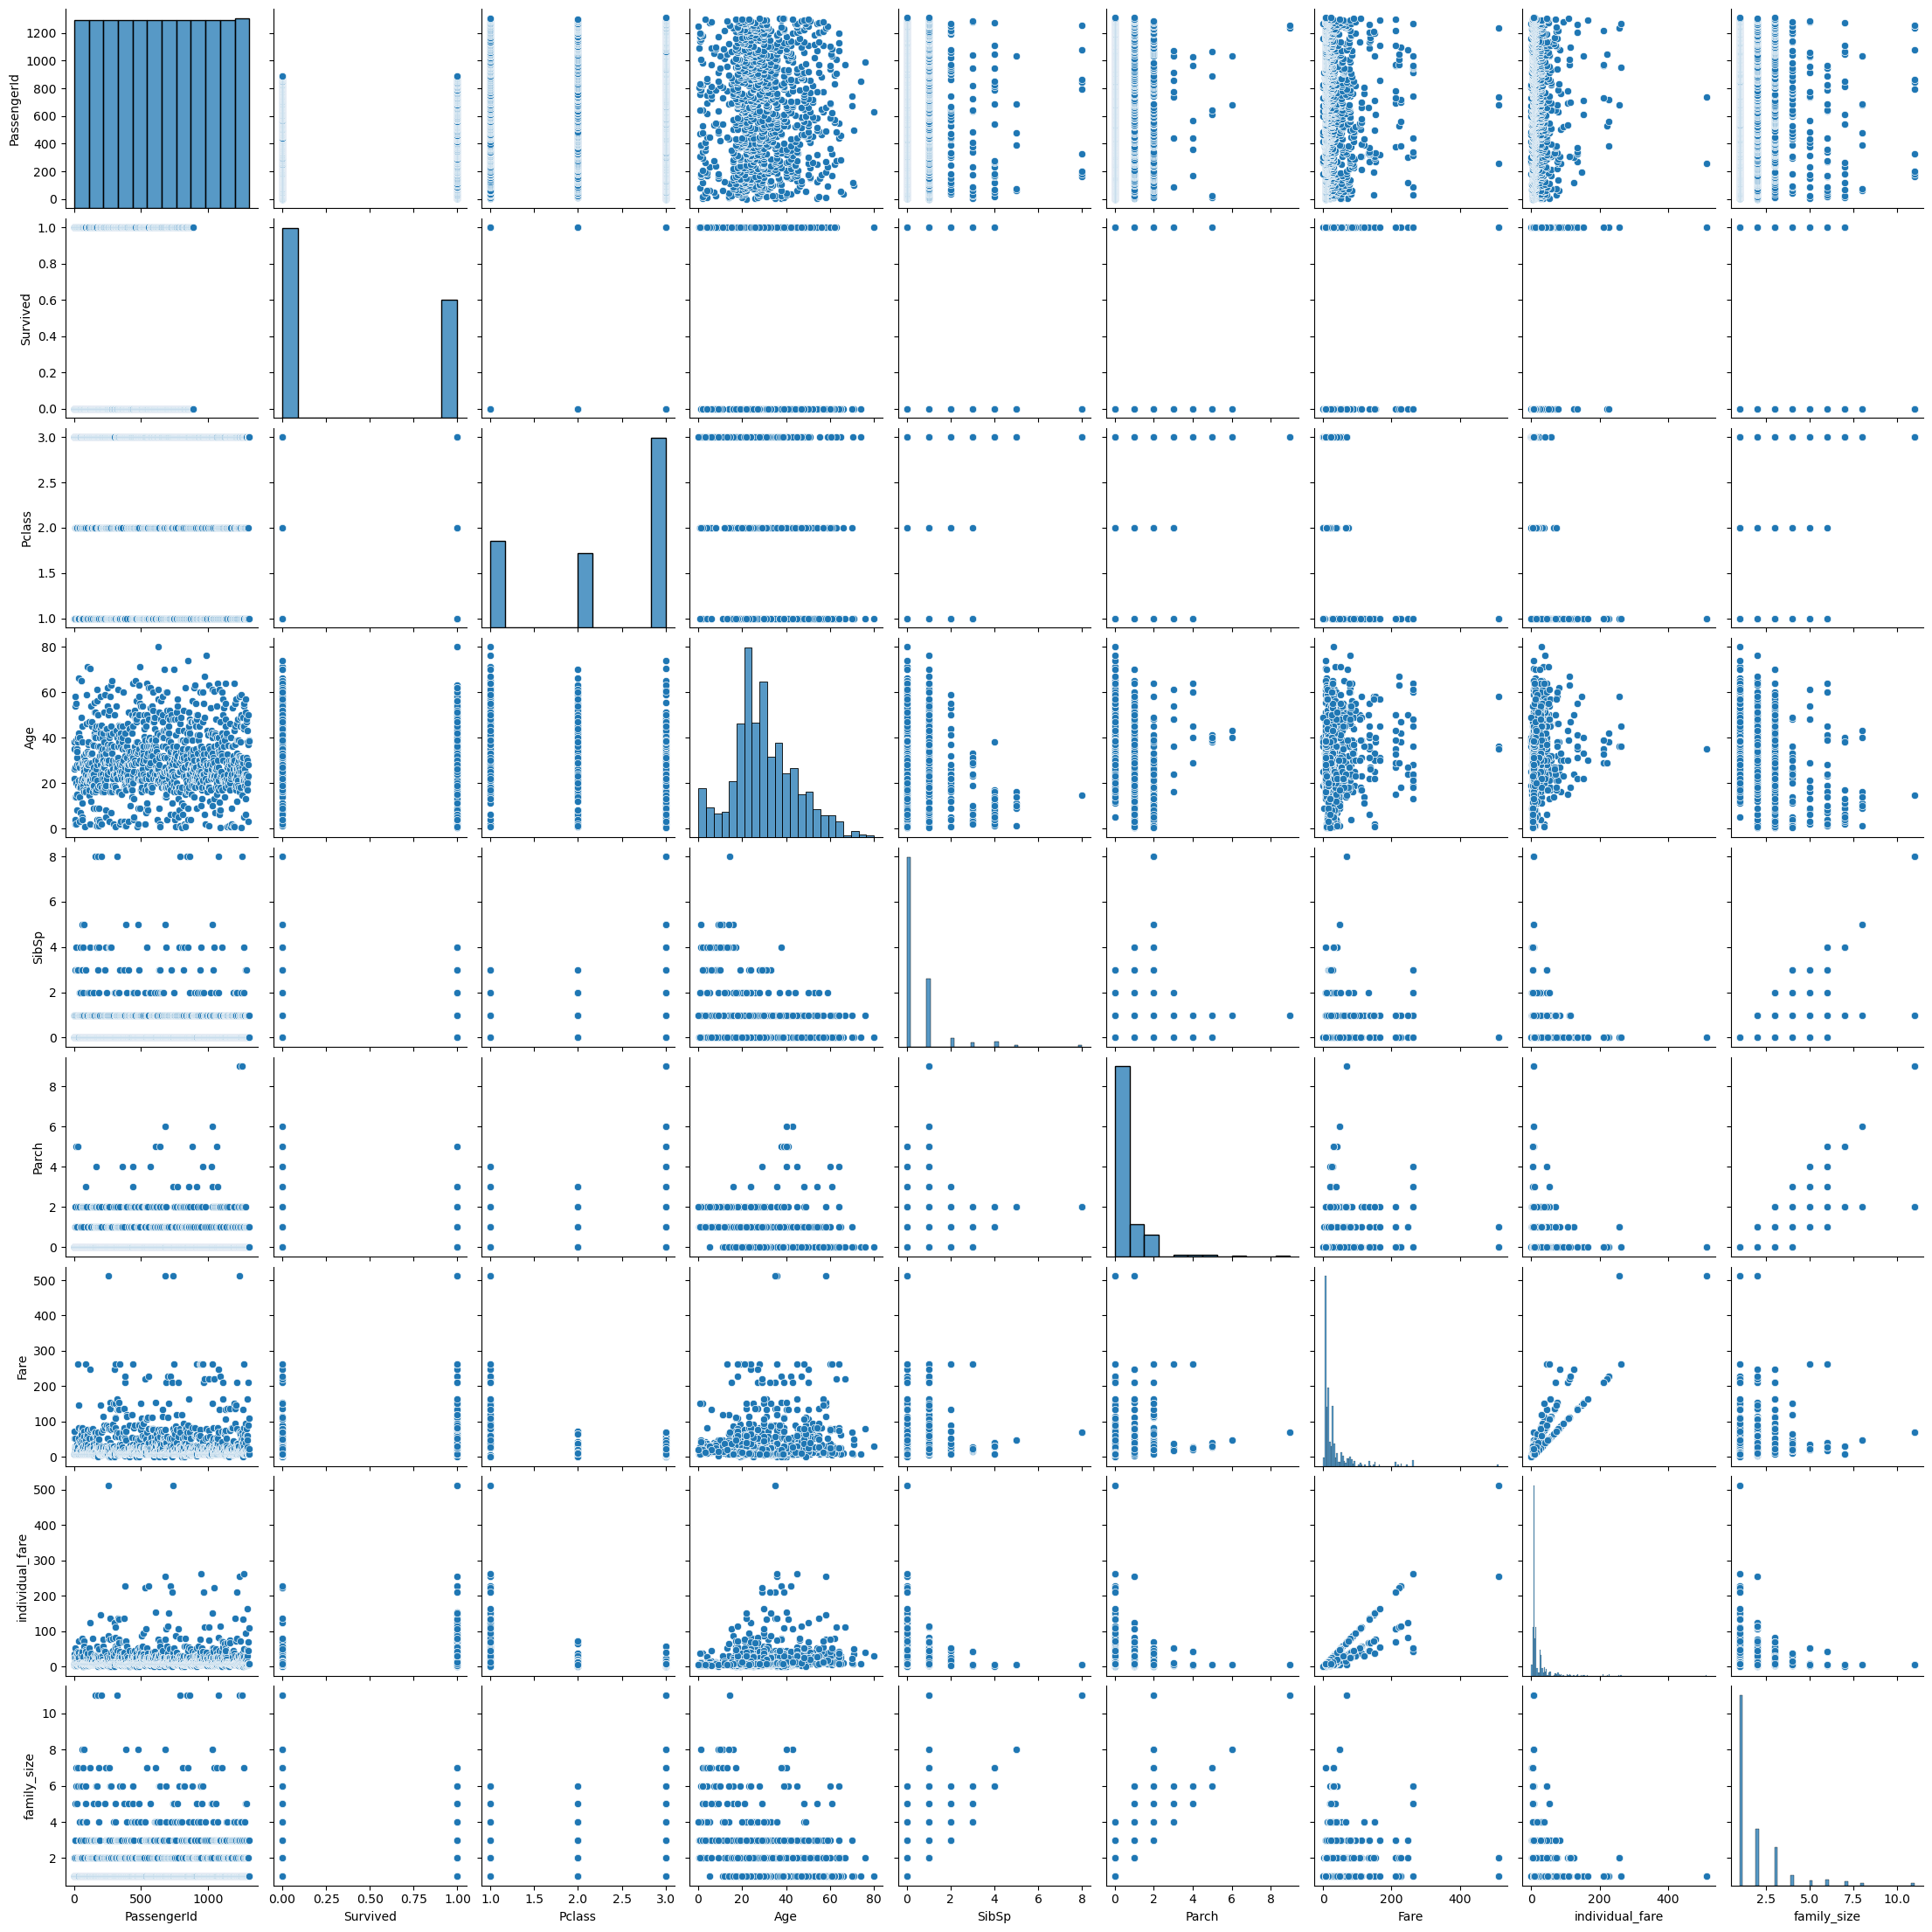

In [110]:
sns.pairplot(df)
plt.show()